# Analyzing text similarities in Metadecidim dataset

Analysis of the Metadecidim dataset. The aim of this report is to analyze similarities between proposals and actions. An action is a cluster of similar proposals. Proposals have been written by the city council, organizations or the general public.

We have obtained the doc2vec embedding of each proposal or action text by calculating the mean of all word2vec of the words that appear in the text, both in Catalan and in Spanish. After that, we have computed text similarity between proposals and actions text by applying several distance functions of the doc2vecs (cosinus, euclidean, minkonswki and manhattan).

## Sanity check

The first step is to check if distance functions obtain correlated values.

In [73]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py

pd.set_option('display.max_columns', 50)

# set dir
os.chdir("G:\Mi unidad\UPF")
path_to_files = os.getcwd() + "\data"

# import dataset
data = pd.read_csv(path_to_files + "\proposals_actions_similiarity_2_clean.csv", sep=",", header=0)
data = data.drop_duplicates(['id'])
data = data.drop(data.columns[0], axis=1)
data.head(5)

,id,origin,scope,district,category,subcategory,title,description,author_id,author_name,created_at,votes,comments,url,status,description_es,description_ca,title_es,title_ca,action_id,text_ca,text_es,row_order,cos_dist_ca,eucl_dist_ca,mink_dist_ca,manh_dist_ca,cos_dist_es,eucl_dist_es,mink_dist_es,manh_dist_es
0,3158,citizenship,district,Horta - Guinardó,Bon viure,Educació i coneixement,Institut al barri d'Horta.,Inici del procediment per a la construcció d'u...,512,Solidaritat Catalana per la Independència,2/19/2016,373,17,https://decidim.barcelona.cat/proposals/instit...,accepted,Inicio del procedimiento para la construcción ...,Inici del Procediment per a la construcció d'1...,Instituto en el barrio de Horta.,Institut al barri d'Horta.,5061,Institut al barri d'Horta.. Inici del Procedim...,Instituto en el barrio de Horta.. Inicio del p...,0,0.43,16.69,4.09,55.95,0.86,60.42,7.77,107.38
1,6774,citizenship,district,Gràcia,Transició ecològica,Urbanisme per als barris,Reformar el carrer Verdi a l'entorn del Mercat...,"El carrer Verdi, del mercat en amunt, actua co...",15153,Xavier Sisternas,3/24/2016,7,0,https://decidim.barcelona.cat/proposals/reform...,accepted,"La calle Verdi, del mercado para arriba, actúa...","El carrer Verdi, del mercat en amunt, actua co...",Reformar la calle Verdi en el entorno del Merc...,Reformar el carrer Verdi a l'entorn del Mercat...,2717,Reformar el carrer Verdi a l'entorn del Mercat...,Reformar la calle Verdi en el entorno del Merc...,1,0.58,17.80,4.22,58.03,0.90,63.32,7.96,110.14
2,1691,citizenship,district,Sarrià - Sant Gervasi,Transició ecològica,Energia i canvi climàtic,Planta de compostatge als barris de la muntany...,La recollida verda als barris de la muntanya e...,4466,salvaferran,02/10/2016,70,2,https://decidim.barcelona.cat/proposals/planta...,accepted,La recogida verde en los barrios de la montaña...,La Recollida verda als barris de la muntanya é...,Planta de compostaje en los barrios de la mont...,Planta de compostatge als barris de la muntany...,5437,Planta de compostatge als barris de la muntany...,Planta de compostaje en los barrios de la mont...,2,0.34,7.52,2.74,36.79,0.43,10.27,3.21,45.10
3,5179,organization,city,NaN,Economia plural,Ocupació de qualitat,Elevar el niverll academic als joves professio...,Molts joves amb determinades i diferents exper...,6285,NaN,3/15/2016,1,0,https://decidim.barcelona.cat/proposals/elevar...,accepted,Muchos jóvenes con determinadas y diferentes e...,MOLTS joves amb DETERMINADES i Diferents exper...,Elevar el niverll académico a los jóvenes prof...,Elevar el niverll academic ALS joves professio...,5641,Elevar el niverll academic ALS joves professio...,Elevar el niverll académico a los jóvenes prof...,3,0.34,11.14,3.34,46.64,1.02,37.25,6.10,85.30
4,810,official,district,Sant Andreu,Economia plural,Turisme sostenible,Rutes guiades per Sant Andreu,Oferir visites guiades per donar a conèixer el...,1,Ajuntament de Barcelona,1/29/2016,20,2,https://decidim.barcelona.cat/proposals/rutes-...,accepted,Ofrecer visitas guiadas para dar a conocer los...,Oferir visites guiades per donar a Conèixer a ...,Rutas guiadas por San Andrés,Rutes guiades per Sant Andreu,5511,Rutes guiades per Sant Andreu. Oferir visites ...,Rutas guiadas por San Andrés. Ofrecer visitas ...,4,0.02,0.75,0.87,11.97,0.81,29.33,5.42,75.95


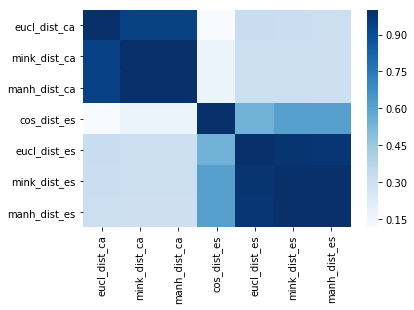

In [74]:
# calculate the correlation matrix
corr = data[data.columns[24:32]].corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Blues")

## Ranking of the most modified proposals

We analyze those proposals that have changed the most with respect to their actions. We also compare their distances taking account the language and the origin of the proposal's author (Catalan or Spanish).

In [75]:
data_sort_cos_dist_ca = data.sort_values('cos_dist_ca', ascending = False).head(10)
data_sort_cos_dist_es = data.sort_values('cos_dist_es', ascending = False).head(10)

data_sort_eucl_dist_ca = data.sort_values('eucl_dist_ca', ascending = False).head(10)
data_sort_eucl_dist_es = data.sort_values('eucl_dist_es', ascending = False).head(10)

data_sort_mink_dist_ca = data.sort_values('mink_dist_ca', ascending = False).head(10)
data_sort_mink_dist_es = data.sort_values('mink_dist_es', ascending = False).head(10)

data_sort_manh_dist_ca = data.sort_values('manh_dist_ca', ascending = False).head(10)
data_sort_manh_dist_es = data.sort_values('manh_dist_es', ascending = False).head(10)

Most changed proposals taking account (1) **cosinus**, (2) **euclidean**, (3) **minnkonswki** and (4) **manhattan**.

In [76]:
pd.merge(data_sort_cos_dist_ca, data_sort_cos_dist_es, on = 'id')

,id,origin_x,scope_x,district_x,category_x,subcategory_x,title_x,description_x,author_id_x,author_name_x,created_at_x,votes_x,comments_x,url_x,status_x,description_es_x,description_ca_x,title_es_x,title_ca_x,action_id_x,text_ca_x,text_es_x,row_order_x,cos_dist_ca_x,eucl_dist_ca_x,...,title_y,description_y,author_id_y,author_name_y,created_at_y,votes_y,comments_y,url_y,status_y,description_es_y,description_ca_y,title_es_y,title_ca_y,action_id_y,text_ca_y,text_es_y,row_order_y,cos_dist_ca_y,eucl_dist_ca_y,mink_dist_ca_y,manh_dist_ca_y,cos_dist_es_y,eucl_dist_es_y,mink_dist_es_y,manh_dist_es_y
0,5748,meeting,district,Les Corts,Transició ecològica,Medi ambient i espai públic,Regular els objectes de la vorera,Estudiar i regular els objectes que hi ha a la...,9289,suport decidim.HG i Les Corts,3/17/2016,2,0,https://decidim.barcelona.cat/proposals/regula...,accepted,Estudiar y regular los objetos que hay en la a...,Estudiar i regular a els Objectes que hi ha a ...,Regular los objetos de la acera,Regular a els Objectes de la vorera,6026,Regular a els Objectes de la vorera. Estudiar ...,Regular los objetos de la acera. Estudiar y re...,7722,1.18,40.80,...,Regular els objectes de la vorera,Estudiar i regular els objectes que hi ha a la...,9289,suport decidim.HG i Les Corts,3/17/2016,2,0,https://decidim.barcelona.cat/proposals/regula...,accepted,Estudiar y regular los objetos que hay en la a...,Estudiar i regular a els Objectes que hi ha a ...,Regular los objetos de la acera,Regular a els Objectes de la vorera,6026,Regular a els Objectes de la vorera. Estudiar ...,Regular los objetos de la acera. Estudiar y re...,7722,1.18,40.80,6.39,86.51,1.24,66.09,8.13,113.59
1,5751,meeting,district,Les Corts,Transició ecològica,Medi ambient i espai públic,Omplir amb resina els escocells,Omplir amb resina els escocells per evitar cai...,9289,suport decidim.HG i Les Corts,3/17/2016,6,2,https://decidim.barcelona.cat/proposals/omplir...,accepted,Rellenar con resina los alcorques para evitar ...,Omplir amb resina a els escocells per evitar C...,Rellenar con resina los alcorques,Omplir amb resina a els escocells,6026,Omplir amb resina a els escocells. Omplir amb ...,Rellenar con resina los alcorques. Rellenar co...,1285,1.15,33.54,...,Omplir amb resina els escocells,Omplir amb resina els escocells per evitar cai...,9289,suport decidim.HG i Les Corts,3/17/2016,6,2,https://decidim.barcelona.cat/proposals/omplir...,accepted,Rellenar con resina los alcorques para evitar ...,Omplir amb resina a els escocells per evitar C...,Rellenar con resina los alcorques,Omplir amb resina a els escocells,6026,Omplir amb resina a els escocells. Omplir amb ...,Rellenar con resina los alcorques. Rellenar co...,1285,1.15,33.54,5.79,77.69,1.24,45.51,6.75,93.84


In [77]:
pd.merge(data_sort_eucl_dist_ca, data_sort_eucl_dist_es, on = 'id')

,id,origin_x,scope_x,district_x,category_x,subcategory_x,title_x,description_x,author_id_x,author_name_x,created_at_x,votes_x,comments_x,url_x,status_x,description_es_x,description_ca_x,title_es_x,title_ca_x,action_id_x,text_ca_x,text_es_x,row_order_x,cos_dist_ca_x,eucl_dist_ca_x,...,title_y,description_y,author_id_y,author_name_y,created_at_y,votes_y,comments_y,url_y,status_y,description_es_y,description_ca_y,title_es_y,title_ca_y,action_id_y,text_ca_y,text_es_y,row_order_y,cos_dist_ca_y,eucl_dist_ca_y,mink_dist_ca_y,manh_dist_ca_y,cos_dist_es_y,eucl_dist_es_y,mink_dist_es_y,manh_dist_es_y
0,10173,citizenship,district,Sant Martí,Transició ecològica,Verd urbà i biodiversitat,Campanya de desratització,Campanya de desratització,21893,consellsdistrictesantmarti,04/08/2016,2,0,https://decidim.barcelona.cat/proposals/campan...,accepted,Campaña de desratización,Campanya de desratització,Campaña de desratización,Campanya de desratització,2924,Campanya de desratització. Campanya de desrati...,Campaña de desratización. Campaña de desratiza...,905,0.81,174.54,...,Campanya de desratització,Campanya de desratització,21893,consellsdistrictesantmarti,04/08/2016,2,0,https://decidim.barcelona.cat/proposals/campan...,accepted,Campaña de desratización,Campanya de desratització,Campaña de desratización,Campanya de desratització,2924,Campanya de desratització. Campanya de desrati...,Campaña de desratización. Campaña de desratiza...,905,0.81,174.54,13.21,183.2,0.85,230.02,15.17,206.05


In [78]:
pd.merge(data_sort_mink_dist_ca, data_sort_mink_dist_es, on = 'id')

,id,origin_x,scope_x,district_x,category_x,subcategory_x,title_x,description_x,author_id_x,author_name_x,created_at_x,votes_x,comments_x,url_x,status_x,description_es_x,description_ca_x,title_es_x,title_ca_x,action_id_x,text_ca_x,text_es_x,row_order_x,cos_dist_ca_x,eucl_dist_ca_x,...,title_y,description_y,author_id_y,author_name_y,created_at_y,votes_y,comments_y,url_y,status_y,description_es_y,description_ca_y,title_es_y,title_ca_y,action_id_y,text_ca_y,text_es_y,row_order_y,cos_dist_ca_y,eucl_dist_ca_y,mink_dist_ca_y,manh_dist_ca_y,cos_dist_es_y,eucl_dist_es_y,mink_dist_es_y,manh_dist_es_y
0,10173,citizenship,district,Sant Martí,Transició ecològica,Verd urbà i biodiversitat,Campanya de desratització,Campanya de desratització,21893,consellsdistrictesantmarti,04/08/2016,2,0,https://decidim.barcelona.cat/proposals/campan...,accepted,Campaña de desratización,Campanya de desratització,Campaña de desratización,Campanya de desratització,2924,Campanya de desratització. Campanya de desrati...,Campaña de desratización. Campaña de desratiza...,905,0.81,174.54,...,Campanya de desratització,Campanya de desratització,21893,consellsdistrictesantmarti,04/08/2016,2,0,https://decidim.barcelona.cat/proposals/campan...,accepted,Campaña de desratización,Campanya de desratització,Campaña de desratización,Campanya de desratització,2924,Campanya de desratització. Campanya de desrati...,Campaña de desratización. Campaña de desratiza...,905,0.81,174.54,13.21,183.2,0.85,230.02,15.17,206.05


In [79]:
pd.merge(data_sort_manh_dist_ca, data_sort_manh_dist_es, on = 'id')

,id,origin_x,scope_x,district_x,category_x,subcategory_x,title_x,description_x,author_id_x,author_name_x,created_at_x,votes_x,comments_x,url_x,status_x,description_es_x,description_ca_x,title_es_x,title_ca_x,action_id_x,text_ca_x,text_es_x,row_order_x,cos_dist_ca_x,eucl_dist_ca_x,...,title_y,description_y,author_id_y,author_name_y,created_at_y,votes_y,comments_y,url_y,status_y,description_es_y,description_ca_y,title_es_y,title_ca_y,action_id_y,text_ca_y,text_es_y,row_order_y,cos_dist_ca_y,eucl_dist_ca_y,mink_dist_ca_y,manh_dist_ca_y,cos_dist_es_y,eucl_dist_es_y,mink_dist_es_y,manh_dist_es_y
0,10173,citizenship,district,Sant Martí,Transició ecològica,Verd urbà i biodiversitat,Campanya de desratització,Campanya de desratització,21893,consellsdistrictesantmarti,04/08/2016,2,0,https://decidim.barcelona.cat/proposals/campan...,accepted,Campaña de desratización,Campanya de desratització,Campaña de desratización,Campanya de desratització,2924,Campanya de desratització. Campanya de desrati...,Campaña de desratización. Campaña de desratiza...,905,0.81,174.54,...,Campanya de desratització,Campanya de desratització,21893,consellsdistrictesantmarti,04/08/2016,2,0,https://decidim.barcelona.cat/proposals/campan...,accepted,Campaña de desratización,Campanya de desratització,Campaña de desratización,Campanya de desratització,2924,Campanya de desratització. Campanya de desrati...,Campaña de desratización. Campaña de desratiza...,905,0.81,174.54,13.21,183.2,0.85,230.02,15.17,206.05


Study the distribution of distances taking account **language** and **author**.

In [80]:
data['ajuntament_dummy'] =  np.where(data['author_name'] == 'Ajuntament de Barcelona', 1, 0)

groups = data.groupby('ajuntament_dummy')

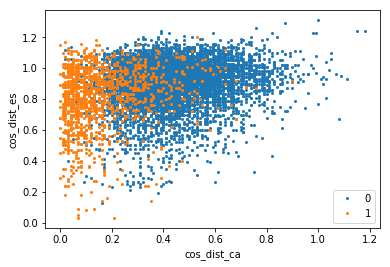

In [81]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.cos_dist_ca, group.cos_dist_es, marker='o', linestyle='', ms=2, label=name)
ax.legend()
ax.set_xlabel("cos_dist_ca")
ax.set_ylabel("cos_dist_es")

plt.show()

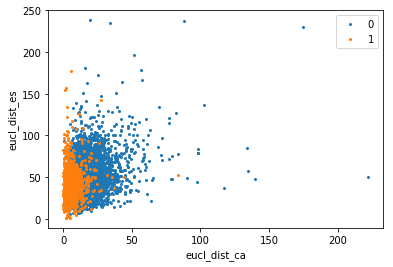

In [82]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.eucl_dist_ca, group.eucl_dist_es, marker='o', linestyle='', ms=2, label=name)
ax.legend()
ax.set_xlabel("eucl_dist_ca")
ax.set_ylabel("eucl_dist_es")

plt.show()

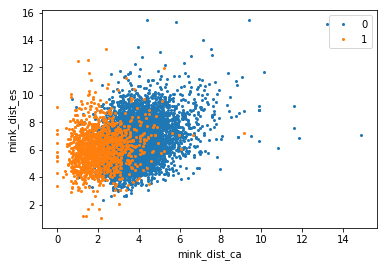

In [83]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.mink_dist_ca, group.mink_dist_es, marker='o', linestyle='', ms=2, label=name)
ax.legend()
ax.set_xlabel("mink_dist_ca")
ax.set_ylabel("mink_dist_es")

plt.show()

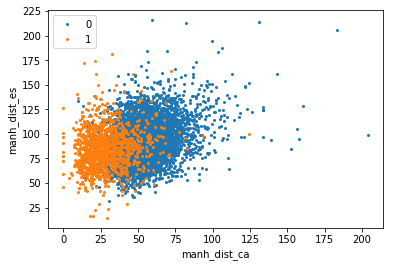

In [84]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.manh_dist_ca, group.manh_dist_es, marker='o', linestyle='', ms=2, label=name)
ax.legend()
ax.set_xlabel("manh_dist_ca")
ax.set_ylabel("manh_dist_es")

plt.show()

Are the proposals of the citizens the ones that have been most modified?

In [92]:
# the activity is computed as the average between votes and comments
data['activity'] =  0.5*data['votes'] +  0.5*data['comments']
data_others = data.loc[data['ajuntament_dummy'] == 0]

data_others.sort_values('activity', ascending = False).head(5)

,id,origin,scope,district,category,subcategory,title,description,author_id,author_name,created_at,votes,comments,url,status,description_es,description_ca,title_es,title_ca,action_id,text_ca,text_es,row_order,cos_dist_ca,eucl_dist_ca,mink_dist_ca,manh_dist_ca,cos_dist_es,eucl_dist_es,mink_dist_es,manh_dist_es,ajuntament_dummy,activity
2757,1256,citizenship,city,NaN,Transició ecològica,Medi ambient i espai públic,Cubriment de la Ronda de Dalt al seu pas per ...,Es una gran infraestructura y hay que buscar l...,983,Tonyan06,02/02/2016,1720,108,https://decidim.barcelona.cat/proposals/cubrim...,accepted,Es una gran infraestructura y hay que buscar l...,És una gran infraestructura i cal buscar la im...,Cubrimiento de la Ronda de Dalt a su paso por ...,Cubriment de la Ronda de Dalt a l'su pas per l...,5115,Cubriment de la Ronda de Dalt a l'su pas per l...,Cubrimiento de la Ronda de Dalt a su paso por ...,2757,0.55,12.30,3.51,48.36,0.80,26.89,5.19,73.95,0,914.0
5940,1448,citizenship,city,NaN,Transició ecològica,Medi ambient i espai públic,RECONVERTIM EL ZOO DE BARCELONA: ZOOXXI,El Zoo de BCN tal i com el coneixem ja no és è...,2135,Rosa Mateu,02/04/2016,896,56,https://decidim.barcelona.cat/proposals/reconv...,accepted,El Zoo de BCN tal y como lo conocemos ya no es...,El Zoo de BCN tal i com el coneixem ja no és è...,Reconvertir el ZOO DE BARCELONA: ZOOXXI,RECONVERTIM ZOO DE BARCELONA: ZOOXXI,5653,RECONVERTIM ZOO DE BARCELONA: ZOOXXI. El Zoo d...,Reconvertir el ZOO DE BARCELONA: ZOOXXI. El Zo...,5940,0.57,13.42,3.66,50.57,0.97,21.36,4.62,62.03,0,476.0
805,1123,citizenship,city,NaN,Transició ecològica,Mobilitat sostenible,Crear mes carrils bici,Promocionar l'us de la bici per reduir contami...,265,Isaac Cereijo,02/01/2016,704,62,https://decidim.barcelona.cat/proposals/crear-...,accepted,Promocionar el uso de la bici para reducir con...,Promocionar l'us de la bici per Reduir contami...,Crear mes carriles bici,Crear mes Carrils bici,5528,Crear mes Carrils bici. Promocionar l'us de la...,Crear mes carriles bici. Promocionar el uso de...,805,0.42,16.57,4.07,56.94,0.74,18.66,4.32,60.89,0,383.0
5384,1332,citizenship,city,NaN,Bon govern,Govern transparent i rendició de comptes,Telefon gratuit d'informació del Ajuntament de...,Som molts els ciutadans que necesitem coneixer...,1604,Eiyeitis,02/03/2016,685,13,https://decidim.barcelona.cat/proposals/telefo...,accepted,Somos muchos los ciudadanos que necesitamos co...,Som MOLTS a els Ciutadans que necesitem coneix...,Teléfono gratuito de información del Ayuntamie...,Telefon gratuit d'informació de l'Ajuntament d...,5051,Telefon gratuit d'informació de l'Ajuntament d...,Teléfono gratuito de información del Ayuntamie...,5384,0.67,29.16,5.40,75.33,0.82,53.99,7.35,100.67,0,349.0
4928,1333,citizenship,district,Horta - Guinardó,Bon viure,Cultura,Retirada de plaques franquistes a tot el distr...,Retirar totes aquelles plaques franquistes de ...,1306,Andreu C. Sánchez,02/03/2016,669,16,https://decidim.barcelona.cat/proposals/retira...,accepted,Retirar todas aquellas placas franquistas de l...,Retirar Totes aquelles plaques franquistes de ...,Retirada de placas franquistas en todo el dist...,Retirada de plaques franquistes a tot el distr...,6008,Retirada de plaques franquistes a tot el distr...,Retirada de placas franquistas en todo el dist...,4928,0.35,7.82,2.80,38.61,0.92,28.12,5.30,72.69,0,342.5


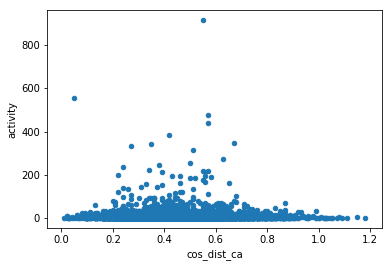

In [86]:
# plots
data_others.plot(kind='scatter', x='cos_dist_ca', y='activity')

plt.show()

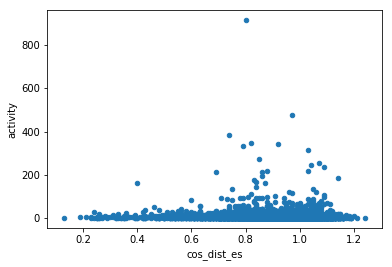

In [101]:
# plots
data_others.plot(kind='scatter', x='cos_dist_es', y='activity')

plt.show()

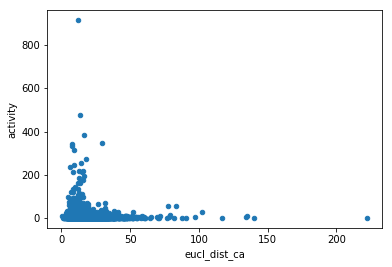

In [102]:
# plots
data_others.plot(kind='scatter', x='eucl_dist_ca', y='activity')

plt.show()

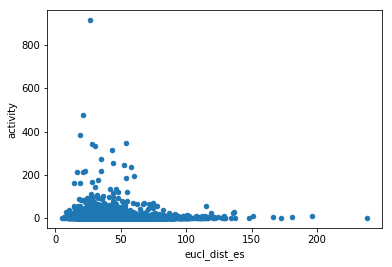

In [103]:
# plots
data_others.plot(kind='scatter', x='eucl_dist_es', y='activity')

plt.show()

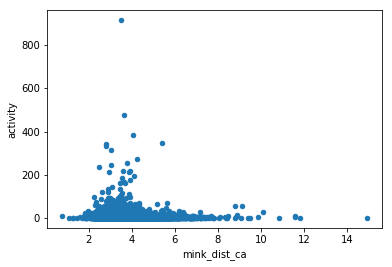

In [106]:
# plots
data_others.plot(kind='scatter', x='mink_dist_ca', y='activity')

plt.show()

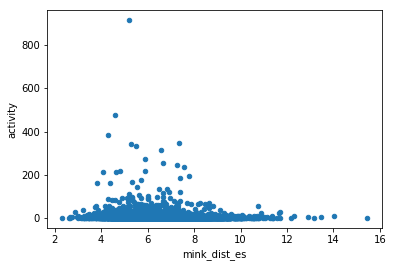

In [107]:
# plots
data_others.plot(kind='scatter', x='mink_dist_es', y='activity')

plt.show()

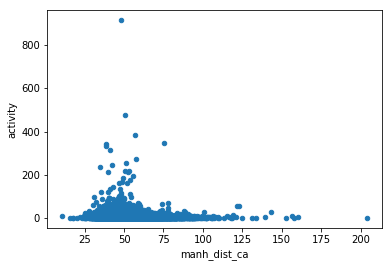

In [108]:
# plots
data_others.plot(kind='scatter', x='manh_dist_ca', y='activity')

plt.show()

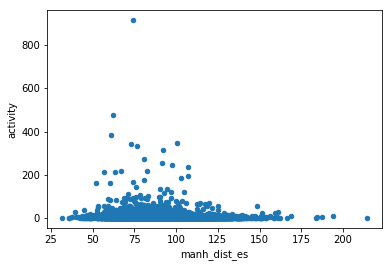

In [109]:
# plots
data_others.plot(kind='scatter', x='manh_dist_es', y='activity')

plt.show()

## Similarities between the proposals of the city council and the citizens

We want to analyze if the texts of actions are closer to the texts of councils or citizens proposals.

In [93]:
# delete actions with no 'Ajuntament de Barcelona' as author in any proposals
data = data.groupby('action_id').filter(lambda df: (df.author_name == 'Ajuntament de Barcelona').any())

# delete actions with only one proposals
data = data.groupby('action_id').filter(lambda df: (len(df)) > 1)

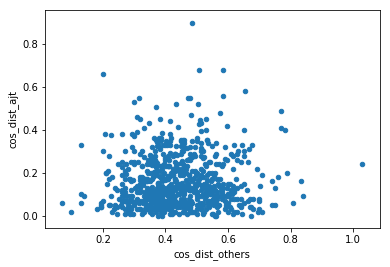

In [94]:
data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).cos_dist_ca.mean().reset_index()
data_ajt.columns.values[1] = "cos_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).cos_dist_ca.mean().reset_index()
data_others.columns.values[1] = "cos_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
data_mean.plot(kind='scatter', x='cos_dist_others', y='cos_dist_ajt')
plt.show()

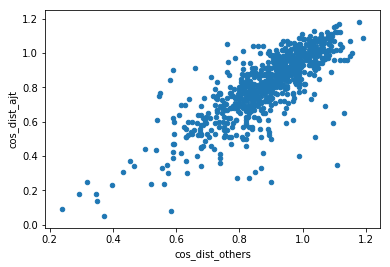

In [98]:
data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).cos_dist_es.mean().reset_index()
data_ajt.columns.values[1] = "cos_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).cos_dist_es.mean().reset_index()
data_others.columns.values[1] = "cos_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
data_mean.plot(kind='scatter', x='cos_dist_others', y='cos_dist_ajt')
plt.show()

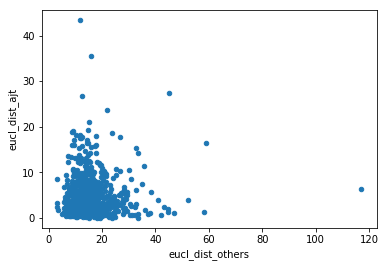

In [97]:
data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).eucl_dist_ca.mean().reset_index()
data_ajt.columns.values[1] = "eucl_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).eucl_dist_ca.mean().reset_index()
data_others.columns.values[1] = "eucl_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
data_mean.plot(kind='scatter', x='eucl_dist_others', y='eucl_dist_ajt')
plt.show()

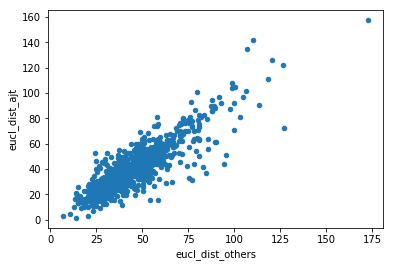

In [45]:
data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).eucl_dist_es.mean().reset_index()
data_ajt.columns.values[1] = "eucl_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).eucl_dist_es.mean().reset_index()
data_others.columns.values[1] = "eucl_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
data_mean.plot(kind='scatter', x='eucl_dist_others', y='eucl_dist_ajt')
plt.show()

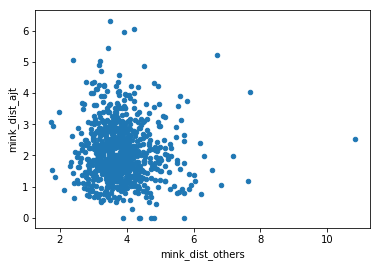

In [46]:
data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).mink_dist_ca.mean().reset_index()
data_ajt.columns.values[1] = "mink_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).mink_dist_ca.mean().reset_index()
data_others.columns.values[1] = "mink_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
data_mean.plot(kind='scatter', x='mink_dist_others', y='mink_dist_ajt')
plt.show()

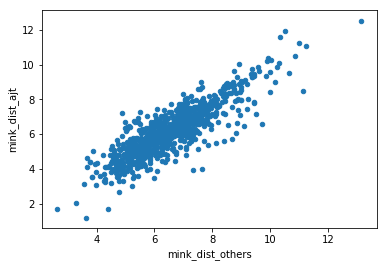

In [48]:
data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).mink_dist_es.mean().reset_index()
data_ajt.columns.values[1] = "mink_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).mink_dist_es.mean().reset_index()
data_others.columns.values[1] = "mink_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
data_mean.plot(kind='scatter', x='mink_dist_others', y='mink_dist_ajt')
plt.show()

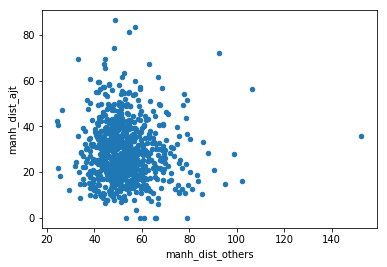

In [49]:
data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).manh_dist_ca.mean().reset_index()
data_ajt.columns.values[1] = "manh_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).manh_dist_ca.mean().reset_index()
data_others.columns.values[1] = "manh_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
data_mean.plot(kind='scatter', x='manh_dist_others', y='manh_dist_ajt')
plt.show()

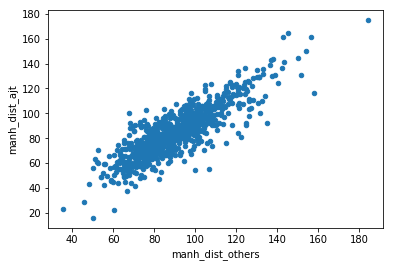

In [50]:
data_ajt = data.loc[data['ajuntament_dummy'] == 1]
data_ajt = data_ajt.groupby(['action_id']).manh_dist_es.mean().reset_index()
data_ajt.columns.values[1] = "manh_dist_ajt"

data_others = data.loc[data['ajuntament_dummy'] == 0]
data_others = data_others.groupby(['action_id']).manh_dist_es.mean().reset_index()
data_others.columns.values[1] = "manh_dist_others"

data_mean = pd.merge(data_ajt, data_others)

# plots
data_mean.plot(kind='scatter', x='manh_dist_others', y='manh_dist_ajt')
plt.show()